<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_4_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

# Part 1

In [1]:
from google.colab import files
uploaded = files.upload()

Saving crx.txt to crx.txt


In [0]:
import pandas as pd
df = pd.read_csv('crx.txt',header=None)

In [0]:
columns=[''.join(['A',str(i)]) for i in range(1,17)]
df.columns = columns


In [14]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [15]:
#number of instances should be 690 and number of attributes should be 15
df.shape

(690, 16)

In [17]:
#checking for missing data
# df.isna().sum() shows zero nans so will have to look at how they indicate data is missing
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [0]:
#ok so they are using question mark.  let's reaplce it with np.nan
import numpy as np
df = df.replace('?',np.nan)

In [0]:
#now checking each column datatype
df.info()
#mismatchbetween the following
##A2: continuous.
##A14: continuous.
#changinf ints to floats too A11, A15


In [0]:
#changing dtypes of those columns
df['A2'] = df['A2'].astype('float')
df['A14'] = df['A14'].str.replace(r"^0+(?!$)", "").astype('float')
df['A11'] = df['A11'].astype('float')
df['A15'] = df['A15'].astype('float')

In [35]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


# Part 2

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
#encoding category data
df_coded=df.copy()
obj_list = ['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16']
for col in obj_list:
  df_coded[col] = pd.Categorical(df_coded[col])
  df_coded[col] = df_coded[col].cat.codes

In [43]:
df_coded.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1.0,0,0,202.0,0.0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6.0,0,0,43.0,560.0,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0.0,0,0,280.0,824.0,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5.0,1,0,100.0,3.0,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0.0,0,2,120.0,0.0,0


In [50]:
#we can see A14 and A15 are teh most variable - i.e. have the highest standard deviation
df_coded.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690.000000,678.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,677.000000,690.000000,690.000000
mean,0.660870,31.568171,4.758725,1.215942,0.466667,5.672464,4.994203,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,184.014771,1017.385507,0.555072
std,0.509195,11.957862,4.978163,0.477087,0.860126,4.320266,2.594506,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,173.806768,5210.102598,0.497318
min,-1.000000,13.750000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.602500,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,75.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,38.230000,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,276.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000


In [0]:
#now filter this into two dataframes: for + which is 0 in teh encoding and - which is 1 in the encoding and see what is looks like
df_plus = df_coded[df_coded['A16']==0].copy()
df_minus = df_coded[df_coded['A16']==1].copy()

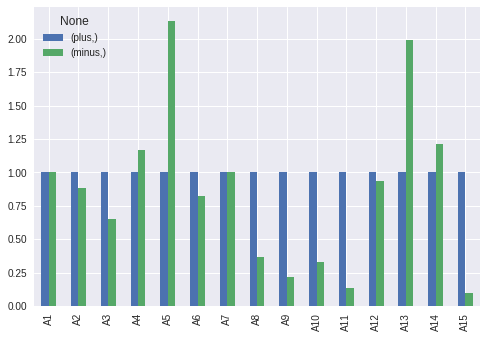

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plus_means = df_plus.mean()
df_plot = pd.DataFrame(plus_means)
minus_means = df_minus.mean()
df_plot[1] = minus_means
df_plot = df_plot[[0,1]].div(df_plot[0],axis=0)

df_plot.columns=[['plus','minus']]
df_plot=df_plot.drop(['A16'])
df_plot.plot(kind='bar');


In [84]:
#so we can see huge difference A5,A9,A10, A11 and A15 with A11 and A15 as teh biggest
#so one feature that is different will choose  A15 and one that is not so different will choose A2
import scipy
from scipy import stats
mean_A15 = df_coded['A15'].mean()
scipy.stats.ttest_1samp(df_plus['A15'],mean_A15,nan_policy='omit')

Ttest_1sampResult(statistic=2.336583473592097, pvalue=0.020106005451071305)

In [85]:
scipy.stats.ttest_1samp(df_minus['A15'],mean_A15,nan_policy='omit')

Ttest_1sampResult(statistic=-23.858881691121024, pvalue=1.1003060833297629e-77)

In [88]:
mean_A1 = df_coded['A1'].mean()
scipy.stats.ttest_1samp(df_plus['A1'],mean_A1,nan_policy='omit'),scipy.stats.ttest_1samp(df_minus['A1'],mean_A1,nan_policy='omit')

(Ttest_1sampResult(statistic=0.013051999141246771, pvalue=0.9895948124634519),
 Ttest_1sampResult(statistic=-0.011077020776612191, pvalue=0.9911677794881409))

In [98]:
#so we can see clearly for A1 they are both drawn from teh same population with pscore 99, but for A15 teh populations
#are very different for each group with p score much less than 0.01 for the minus group
obj_list

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

In [112]:
#making crosstab to explore data

df_cat = df_coded[obj_list].copy()
for col in df_cat.columns:
  df_cat[col]=np.where(df_cat[col]==-1,2,df_cat[col])

ct = pd.crosstab(df_cat['A10'],df_cat['A16'])
ct

A16,0,1
A10,,
0,98,297
1,209,86


In [0]:
#running chi_squared test for each column
chilist
for col in df_cat.columns:
  

In [114]:
test_list = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
chi_list = [] 
for test in test_list:
  ct_temp = pd.crosstab(df_cat[test],df_cat['A16'])
  chi2statistic, pvalue, dof, observed = scipy.stats.chi2_contingency(ct_temp)
  aaa = (test, chi2statistic)
  chi_list.append(aaa)
chi_list

[('A1', 2.2909673396997023),
 ('A4', 23.84103740792851),
 ('A5', 23.84103740792851),
 ('A6', 96.26054870534908),
 ('A7', 42.123969135671885),
 ('A9', 355.2038167412799),
 ('A10', 143.06956205083145),
 ('A12', 0.568273300792113),
 ('A13', 9.191570451545383)]

In [0]:
#so we can see teh most extreme categories are A9 with 355 and A10 with 143 so must be dependent

In [115]:
#we can also check the chi squared tests to see if various inputs are dependent on each other
chi_list2=[]
counter = 0
for i in test_list[0:7]:
  counter = counter +1
  for j in test_list[counter:]:
    ct_temp = pd.crosstab(df_cat[i],df_cat[j])
    chi2statistic, pvalue, dof, observed = scipy.stats.chi2_contingency(ct_temp)
    bbb = (i,j,chi2statistic)
    chi_list2.append(bbb)
    
chi_list2

[('A1', 'A4', 3.9223560136700995),
 ('A1', 'A5', 3.9223560136700995),
 ('A1', 'A6', 96.23291822947844),
 ('A1', 'A7', 32.54390048112967),
 ('A1', 'A9', 6.440172117284834),
 ('A1', 'A10', 5.337798567019764),
 ('A1', 'A12', 2.011131087825057),
 ('A1', 'A13', 5.956234663582035),
 ('A4', 'A5', 1380.0),
 ('A4', 'A6', 35.91036236653044),
 ('A4', 'A7', 191.90192648332828),
 ('A4', 'A9', 19.82640757399717),
 ('A4', 'A10', 25.671002356677054),
 ('A4', 'A12', 2.5174409471111874),
 ('A4', 'A13', 60.058863926327426),
 ('A5', 'A6', 35.91036236653044),
 ('A5', 'A7', 191.9019264833283),
 ('A5', 'A9', 19.82640757399717),
 ('A5', 'A10', 25.67100235667705),
 ('A5', 'A12', 2.517440947111188),
 ('A5', 'A13', 60.058863926327426),
 ('A6', 'A7', 1844.7402531958905),
 ('A6', 'A9', 68.52099010500172),
 ('A6', 'A10', 52.60658543758237),
 ('A6', 'A12', 24.00277236216542),
 ('A6', 'A13', 106.87737146801871),
 ('A7', 'A9', 55.631264221748815),
 ('A7', 'A10', 12.214210122138592),
 ('A7', 'A12', 20.300037353036966),

In [0]:
#so of the varaible we can see ('A4', 'A5', 1380.0), ('A6', 'A7', 1844.7402531958905),are the most extreme cases with noteable high numbers elsewhere

# part 3

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

first of all before we ran the ttests we could see some big differences between the attributes in the 2 classifier groups.  the ttest showed that for thefirst feature (A15) tested they were not drawn form the same populations with such low pvalues, contrasting clearly with A1 which there was negligable difference.  


---



For the chi squared test we could see that some attributes clearly had a big relationship with the classifier, and when we tested them on each other, i.e. attribute to attribute (excluding classifier) we could also see they were heavily dependent on each other in some cases as you would expect with credit data.



---



I had two little hold ups on this, getting my bar chart to work and then getting crosstabs to work as i've used pivots where possible before, and also as i had categorized some attributes as -1 and i had to fix that before continuing as it was stopping the chiquared test from running
i can also see how it's a little harder to work with data when you can't see what that attributes are, but mabye that gets rid of some unwanted biases.